### Loading the libraries

In [145]:
library(RColorBrewer)
library(plyr)
library(ggplot2)
library(igraph)

### Reading the data (csv file)

In [146]:
data<-read.table("080707_01fn.csv", header=T, sep=';', dec=",")#je lis mon fichier
head(data)

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11
1,155.29,2.588167,0,0,0,0,0,0,0,1,0,0,0
2,175.29,2.9215,1,0,0,0,0,0,0,0,0,0,0
3,195.29,3.254833,0,0,0,0,0,0,1,0,0,0,0
4,215.29,3.588167,0,0,0,0,0,0,0,0,0,0,0
5,235.29,3.9215,0,0,0,0,0,1,0,0,0,0,0
6,255.29,4.254833,0,0,0,0,0,0,1,0,0,0,0


In [147]:
# assigne le numéro de la derniere colonne comme numero du dernier neurone
last.neuron.col<-ncol(data)
# assigne le numéro de colonne dont l'en-tête est R1 comme numero du premier neurone
first.neuron.col<-which(colnames(data)=="R1")
# Total number of neurons
nb.neuron<-ncol(data)-first.neuron.col+1 
cat('Number of neurons:', nb.neuron, '\n\n')
# array contenant les colonnes contenant les neurones
neuron.col<-first.neuron.col:last.neuron.col 
cat('Column number of the neurons:', neuron.col, '\n\n')
# defini les noms des neurones
neuron.names<-colnames(data)[neuron.col]
cat('Name of the neurons:', neuron.names, '\n\n')

Number of neurons: 11 

Column number of the neurons: 3 4 5 6 7 8 9 10 11 12 13 

Name of the neurons: R1 R2 R3 R4 R5 R6 R7 R8 R9 R10 R11 



# Analysis of the individual distributions

##### Extraction of the data for each neuron when signal equal 1 

In [148]:
#R1<-data[data $R1==1, c("sec","min","R1")]

In [149]:
head(subset(data, data[,3]==1, c(1:2,3)))

,sec,min,R1
2,175.29,2.9215,1
8,295.3,4.921667,1
15,435.33,7.2555,1
20,535.33,8.922167,1
40,935.41,15.59017,1
42,975.41,16.25683,1


In [150]:
for (neuron in neuron.col){
    #print(head(subset(data, data[,neuron]==1, c(1:2,neuron))))
    assign(paste0("R", neuron-2), subset(data, data[,neuron]==1, c(1:2,neuron)))
}

We have now 11 dataframes (R1 to R11) containing the time when the neuron signal is equal to 1.

#### Cumulative sum of the events

Making a list of the data frames

In [151]:
RList <- list(R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11)

Define a function that will add the cumulative sum column

In [152]:
cumulative_sum <- function(name){
    cumsum <- cumsum(name)[,3]
    name <- cbind(name, cumsum)
}

Applying the function to the list of neurons

In [196]:
RList <- lapply(RList, cumulative_sum)
#head(RList[[11]])

Plotting the cumulative process

In [154]:
#plot(RList[[1]]$cumsum,RList[[1]]$min,pch=3)

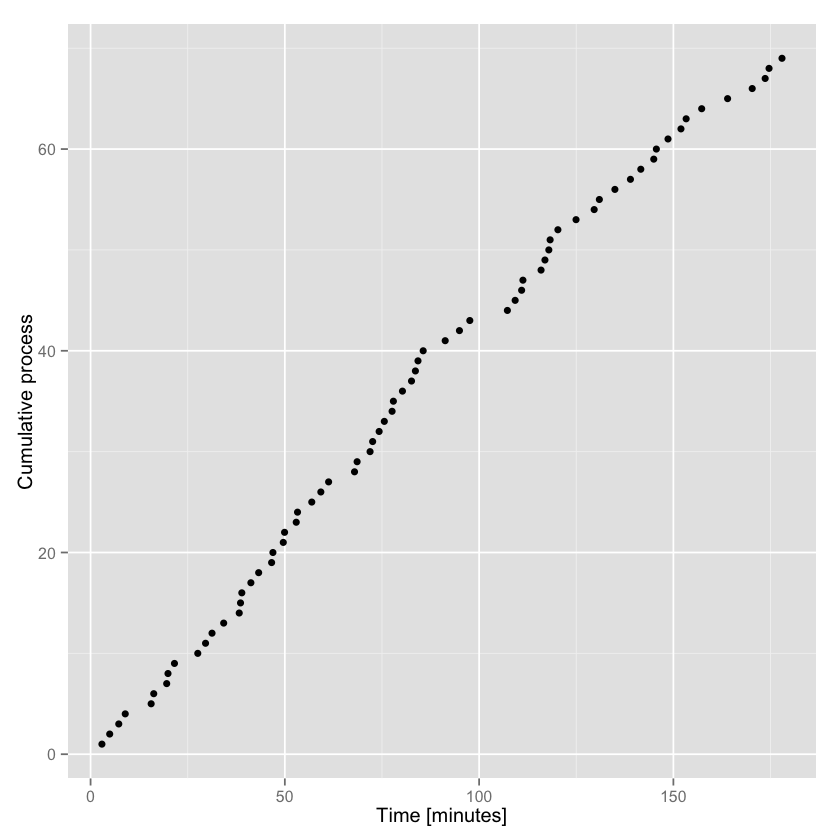

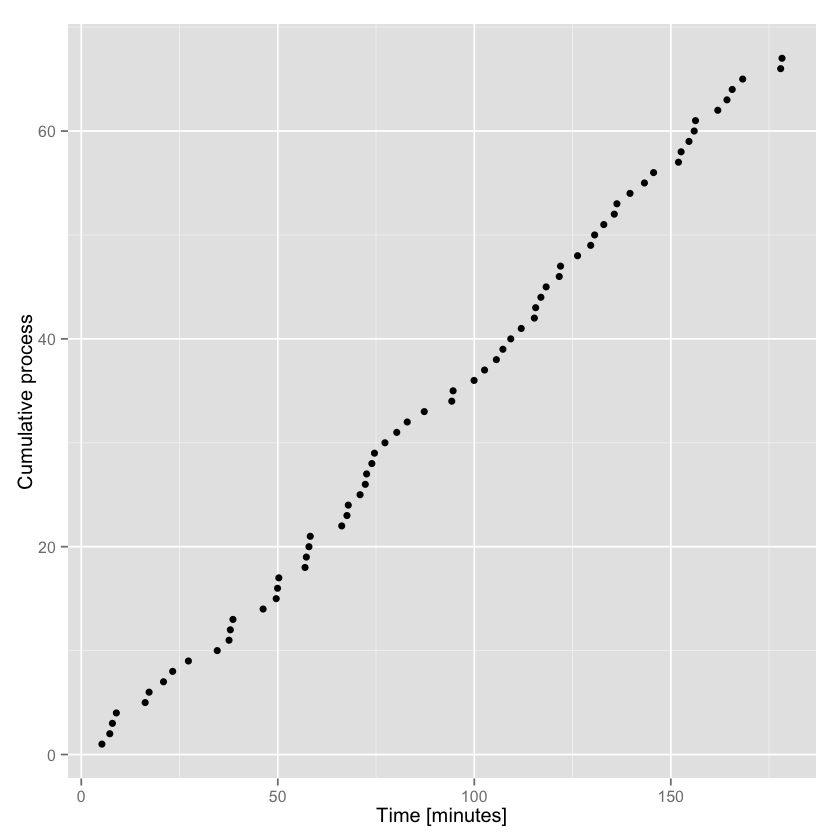

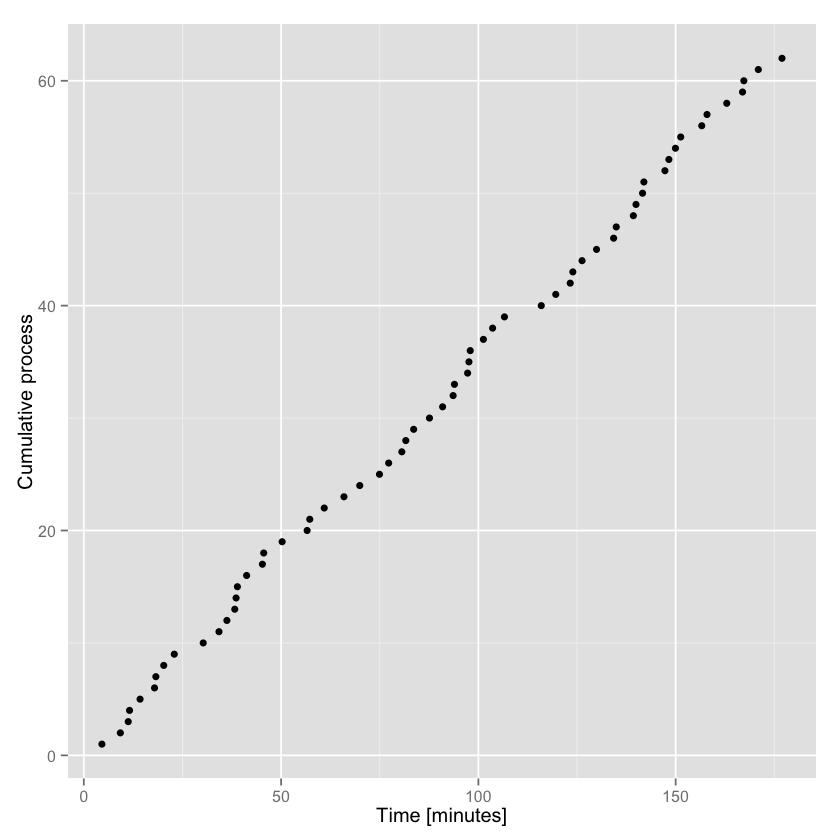

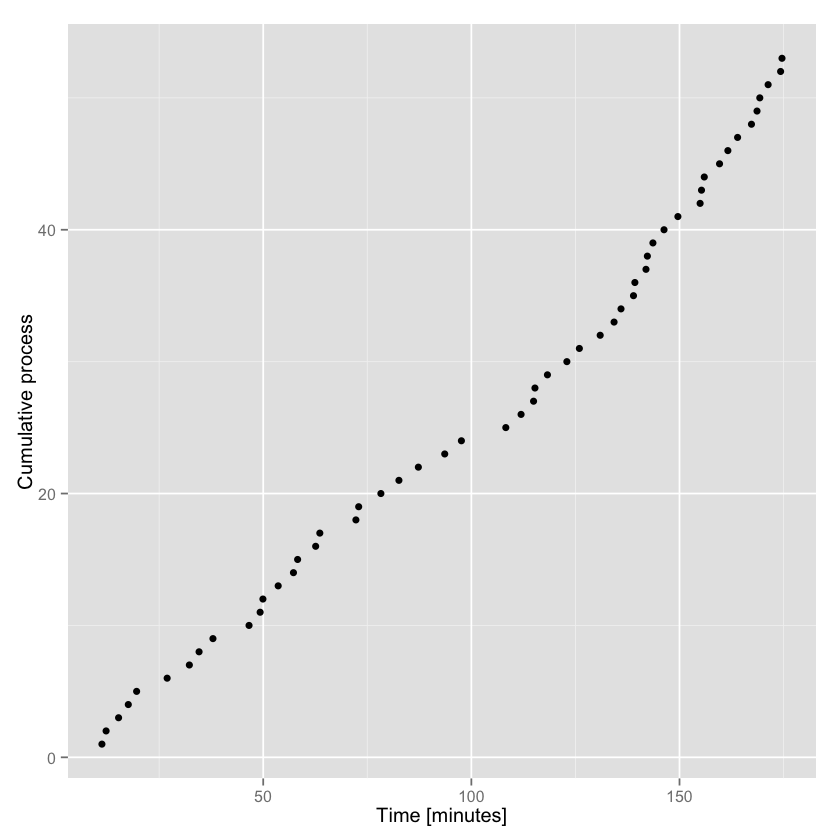

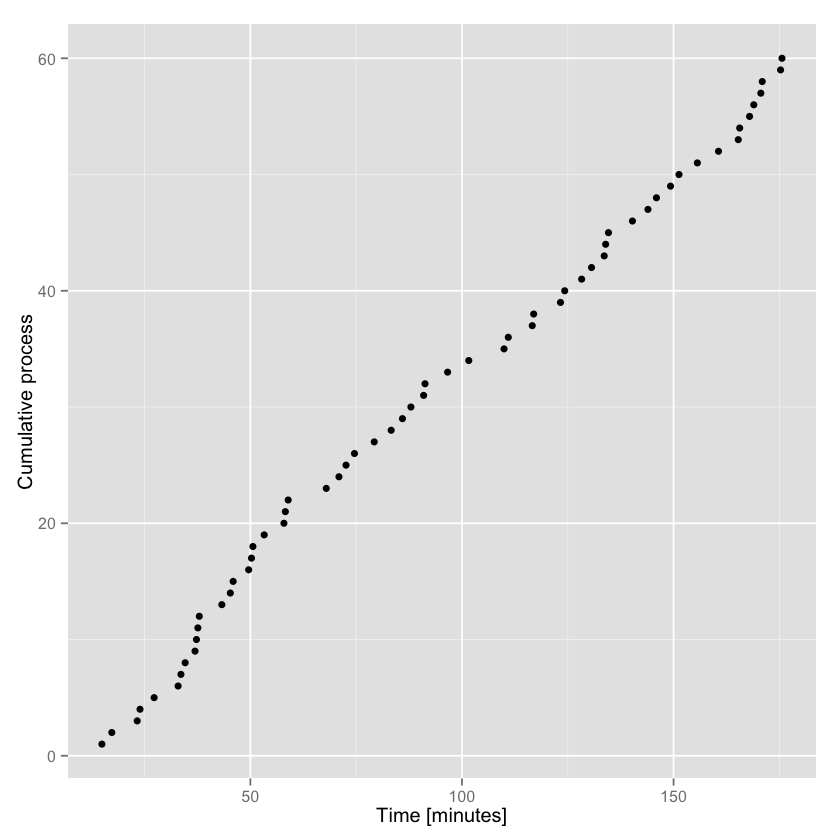

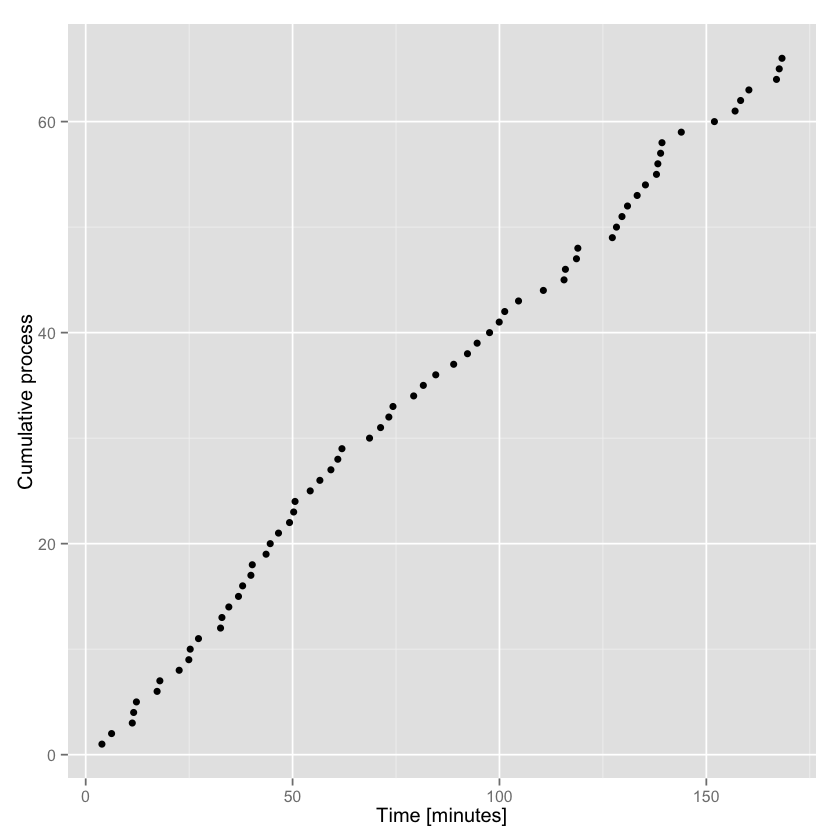

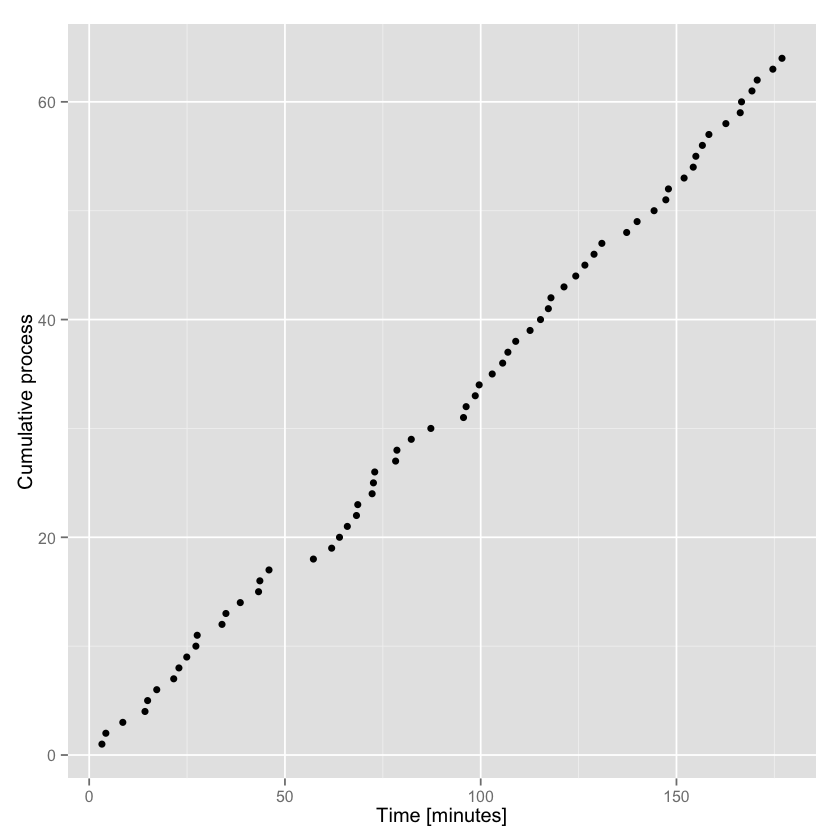

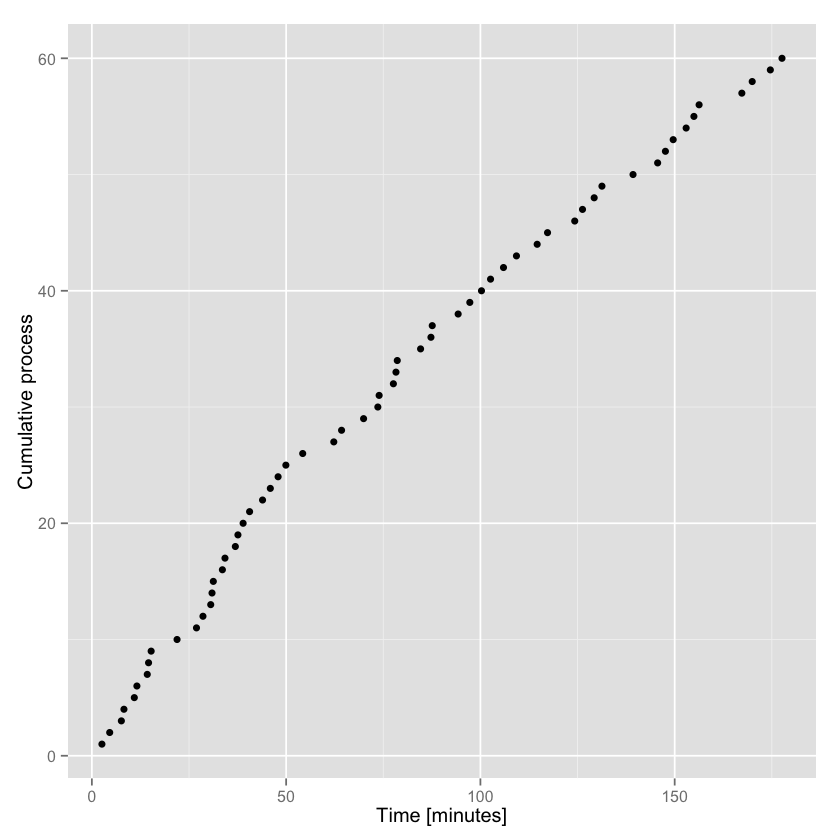

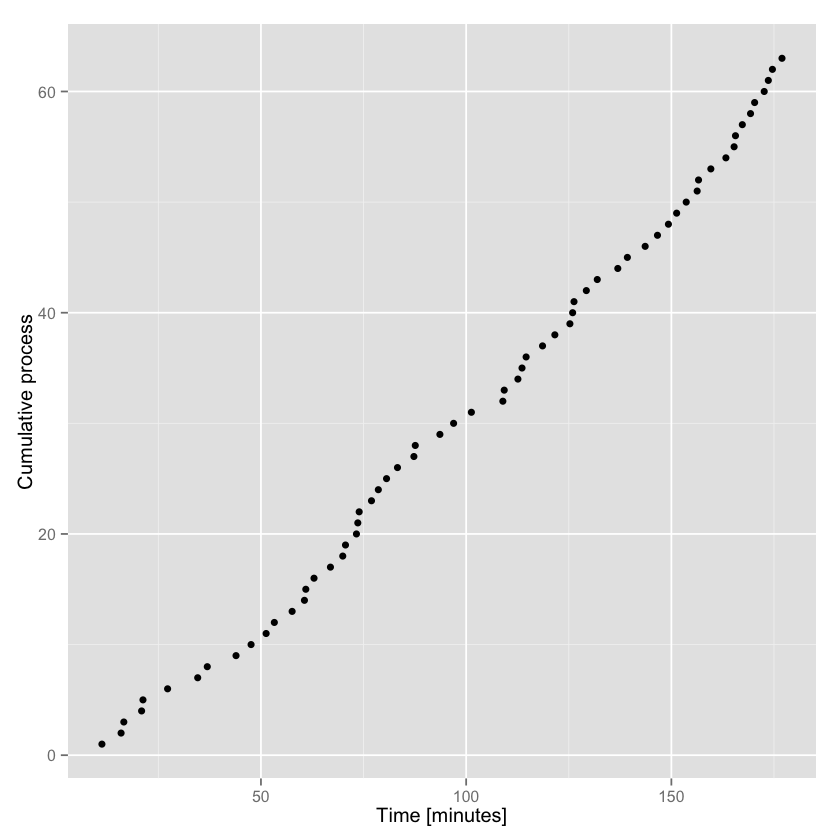

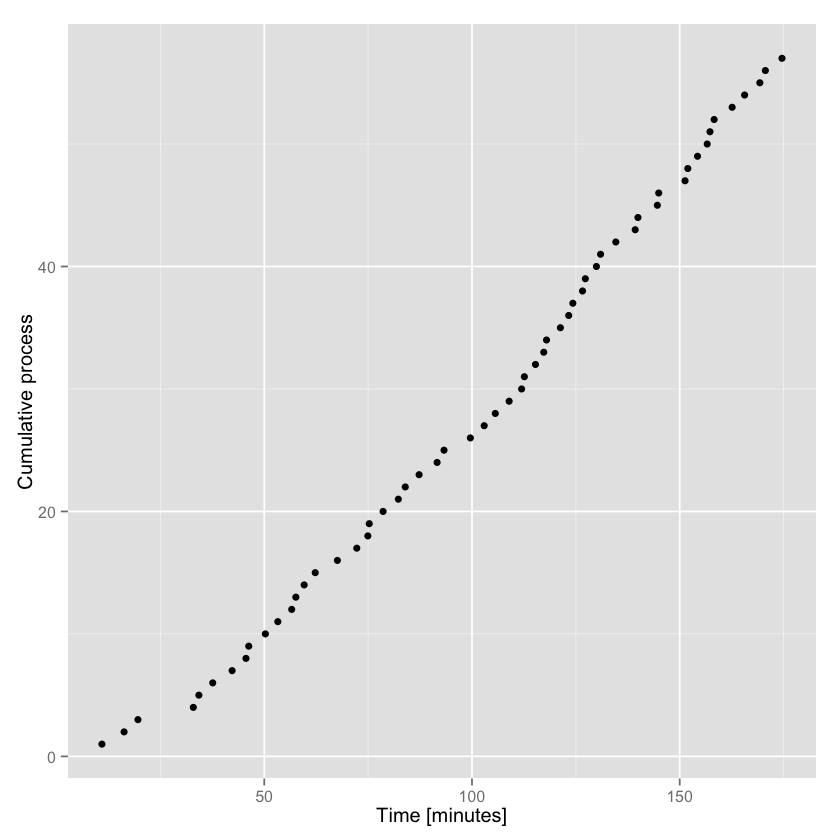

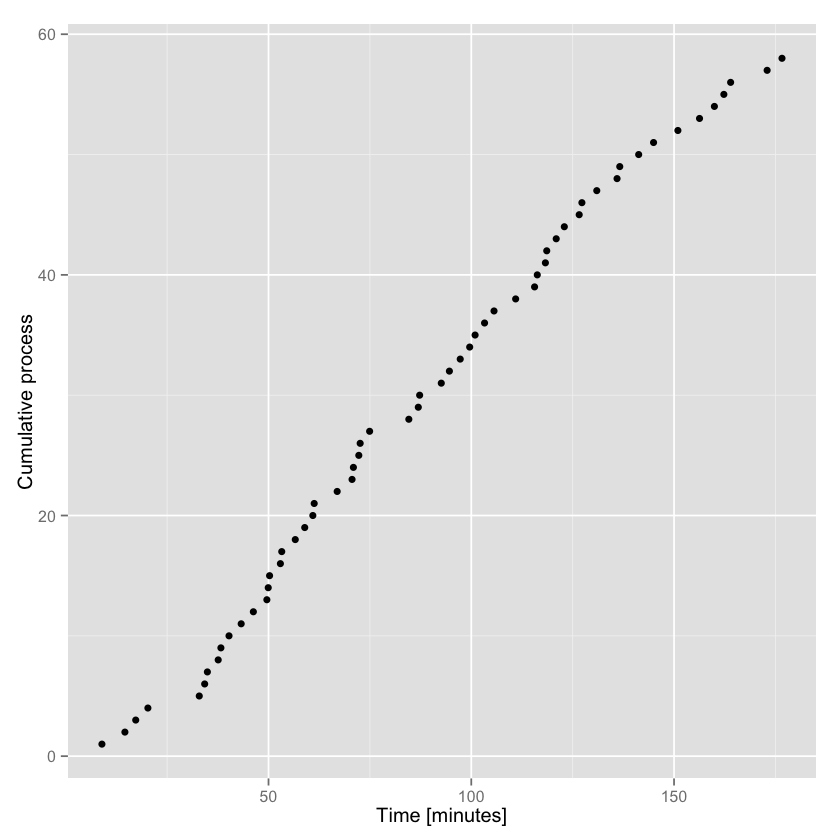

In [155]:
for(i in 1:length(RList)){
    plot <- qplot(min, cumsum, data=RList[[i]], xlab="Time [minutes]", ylab="Cumulative process")
    print(plot)
}

#### Creating a time vector when the neuron is active 

In [156]:
TimeList <- NULL #start with an empty list
for(i in 1:length(RList)){
    TimeList <- c(TimeList, data.frame(RList[[i]]$min))
}
#TimeList

Creating the list of time intervals

In [157]:
#TimeList[[1]][-1] #Remove the 1st value
#TimeList[[1]][-length(TimeList[[1]])] # Remove the last value
#deltaR1 <- TimeList[[1]][-1] - TimeList[[1]][-length(TimeList[[1]])]
for(i in 1:length(TimeList)){
    assign(paste0("dt_R", i), TimeList[[i]][-1] - TimeList[[i]][-length(TimeList[[i]])])
}

In [158]:
dt_RList <- list(data.frame(dt_R1),data.frame(dt_R2),data.frame(dt_R3),data.frame(dt_R4),data.frame(dt_R5),data.frame(dt_R6),data.frame(dt_R7),data.frame(dt_R8),data.frame(dt_R9),data.frame(dt_R10),data.frame(dt_R11))
#dt_RList[[1]]

Plotting the histogram of the time intervals

In [159]:
#ggplot(dt_RList[[1]], aes(x=dt_R1)) + geom_histogram(binwidth = 1/3+0.01, fill='blue', alpha=.6) # 1/3 because acquisitions happened every 20 seconds (=1/3 minute)

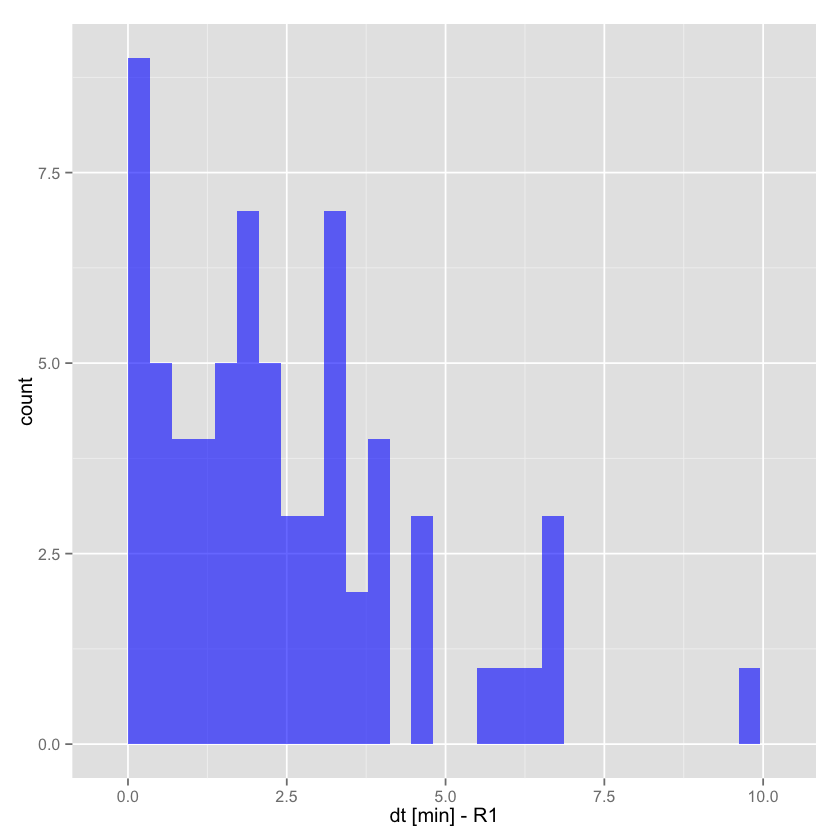

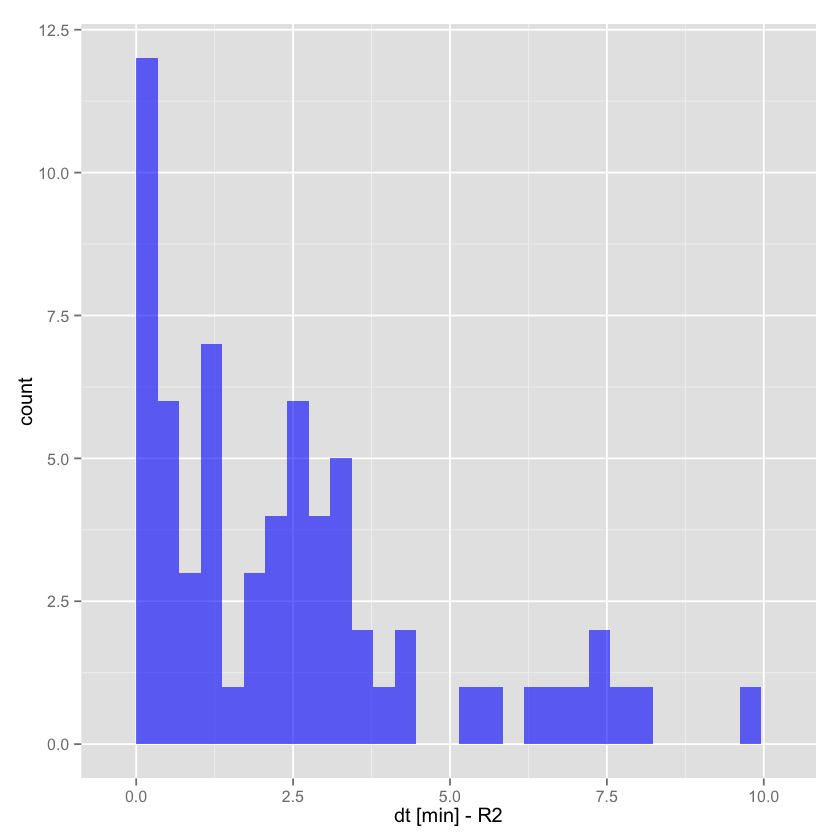

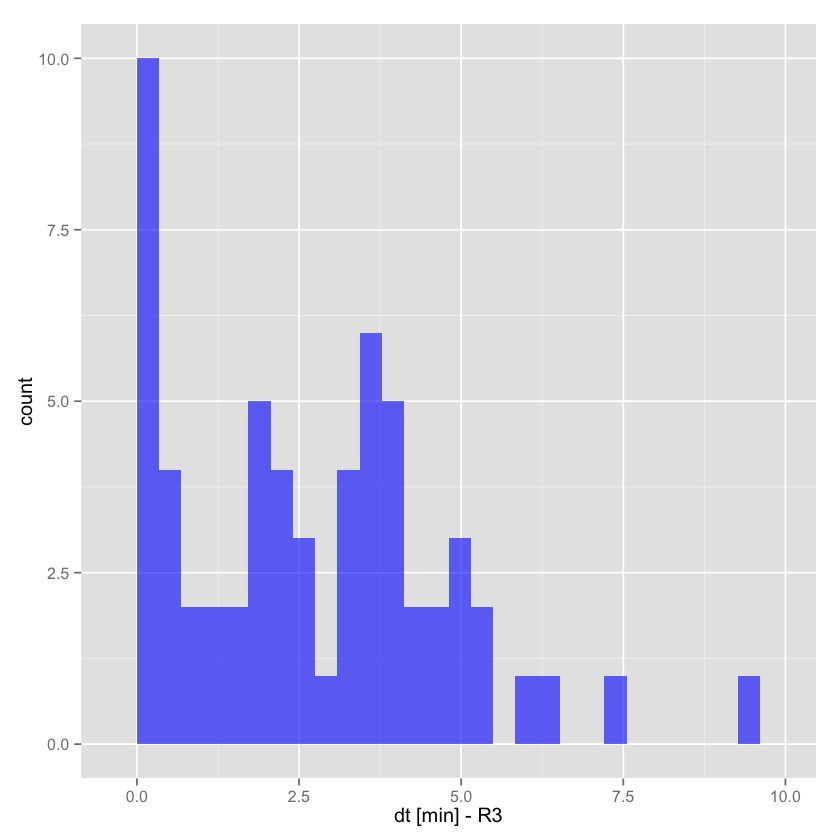

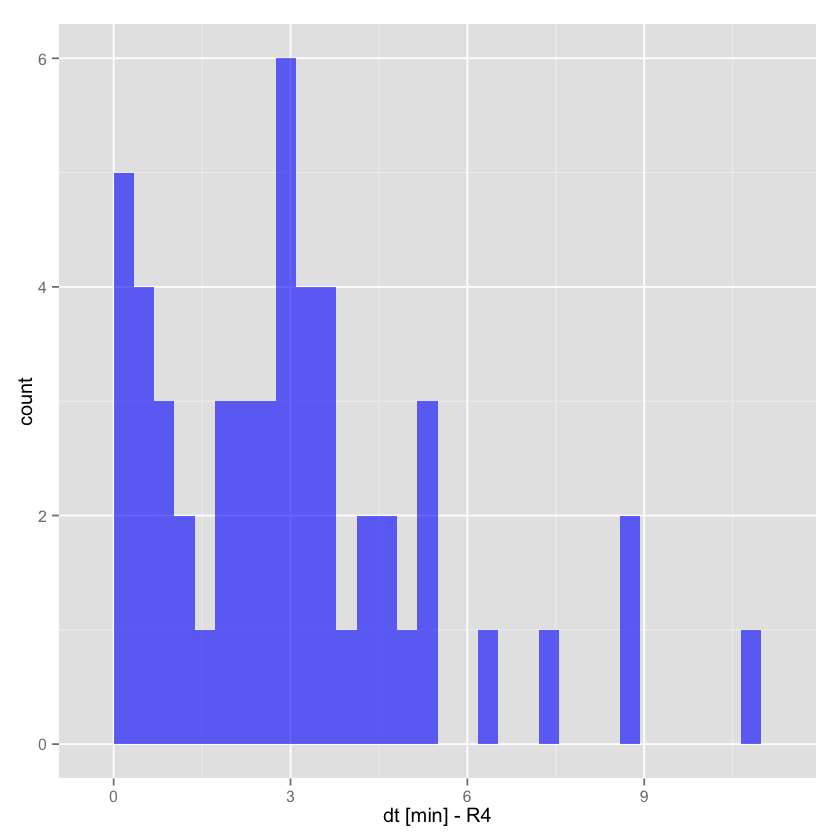

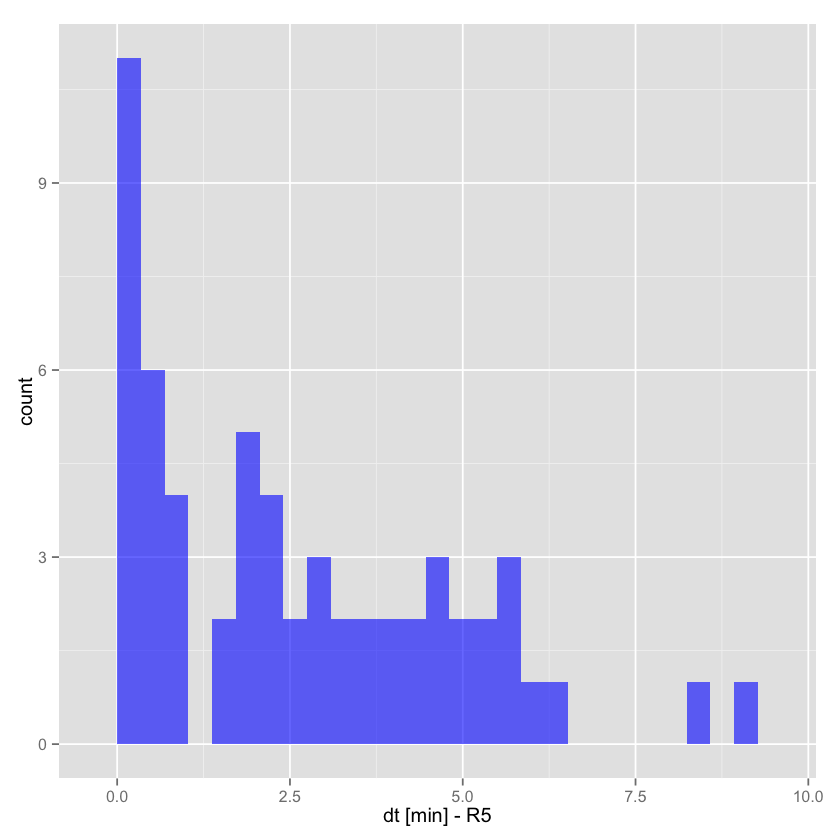

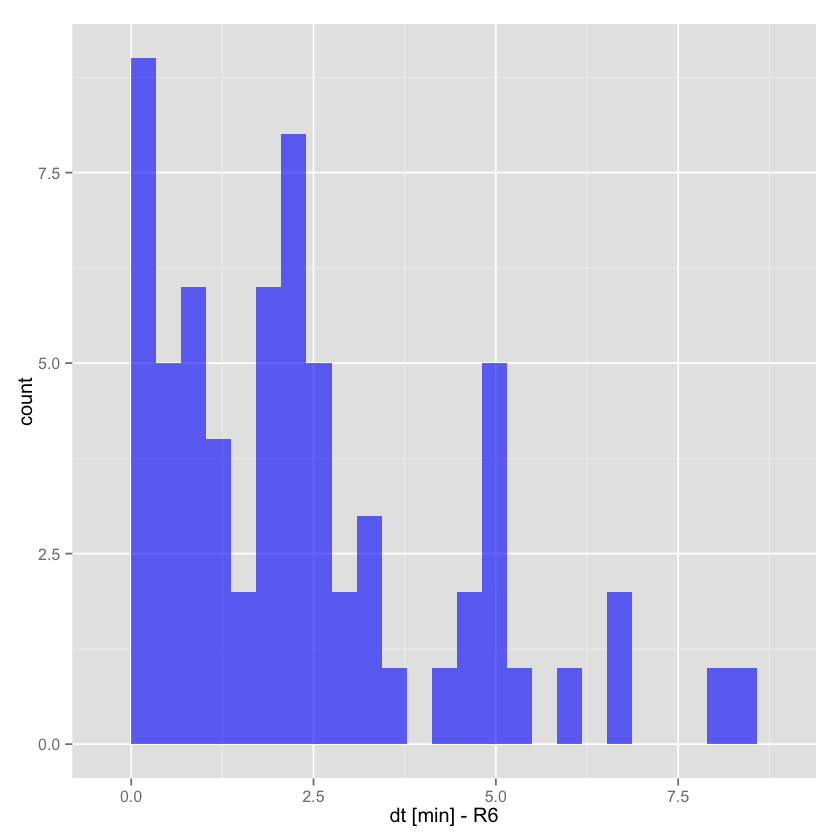

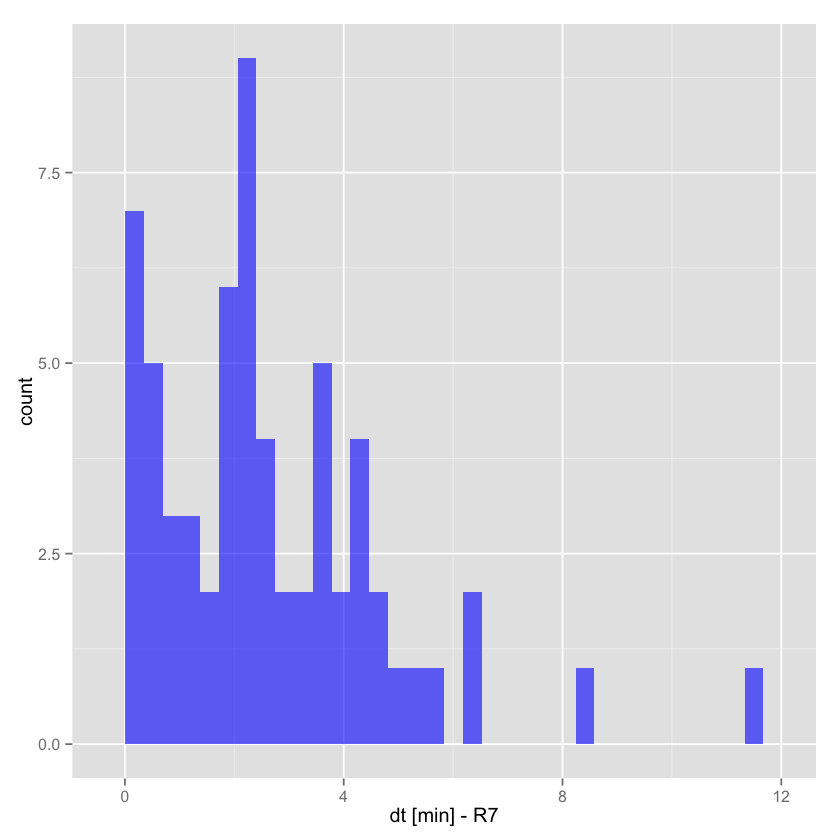

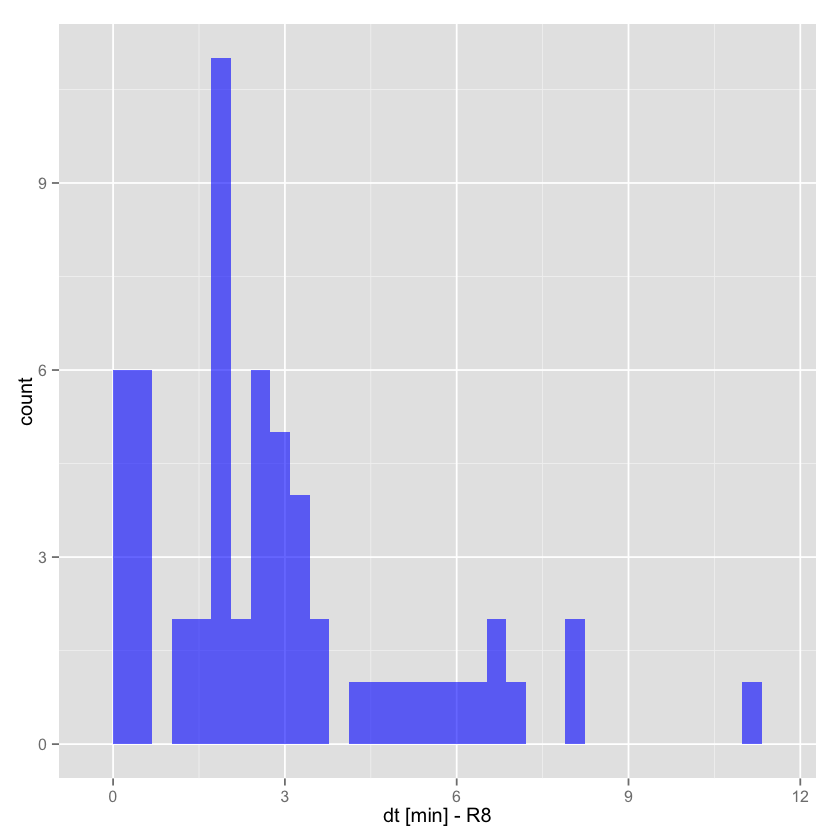

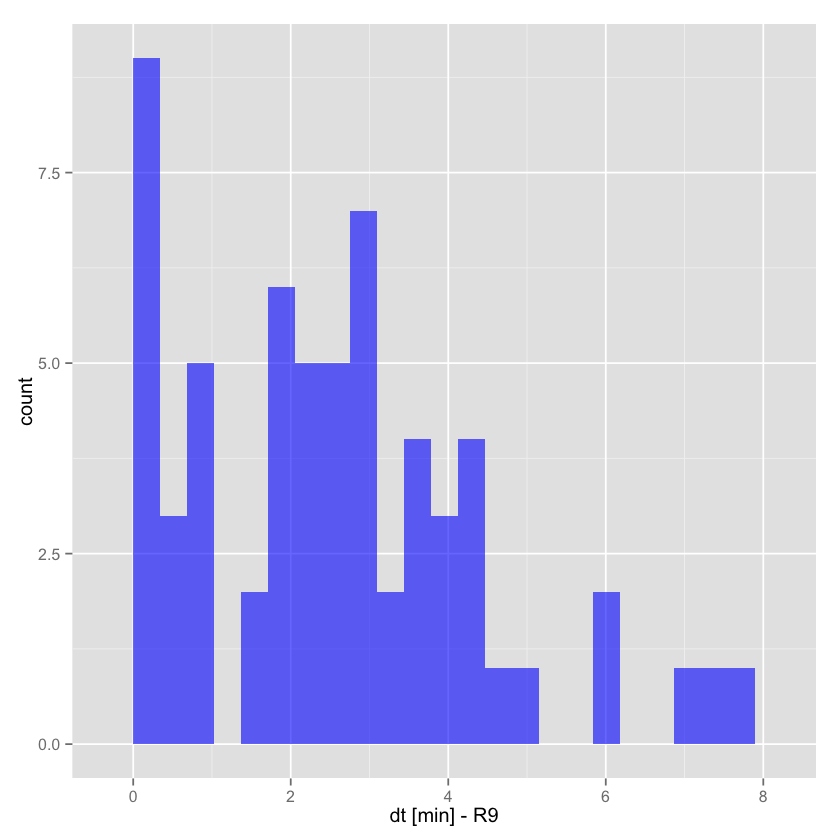

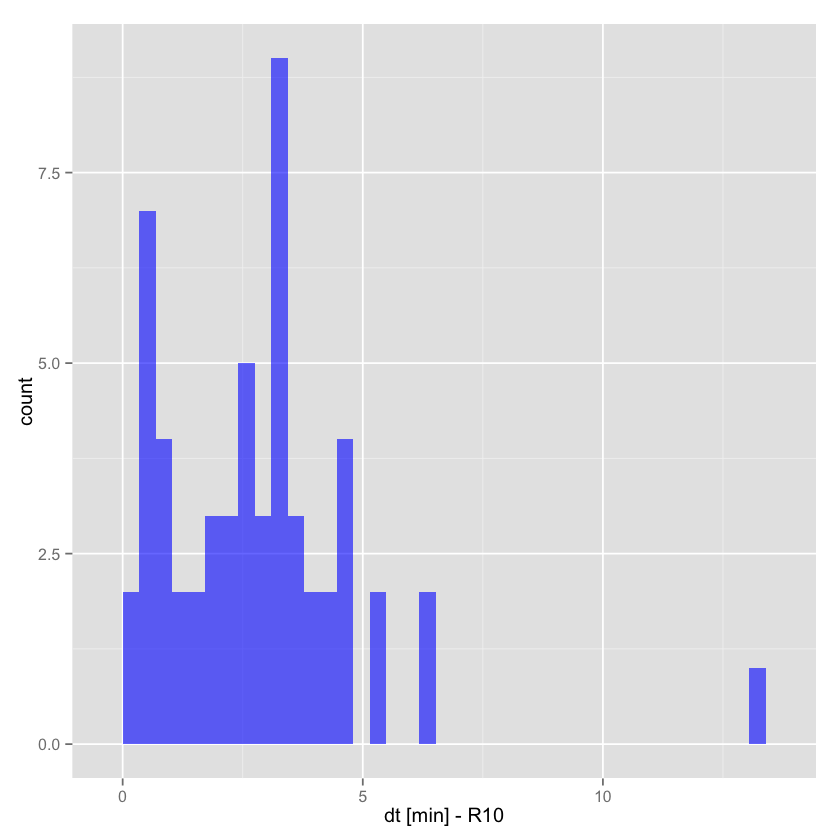

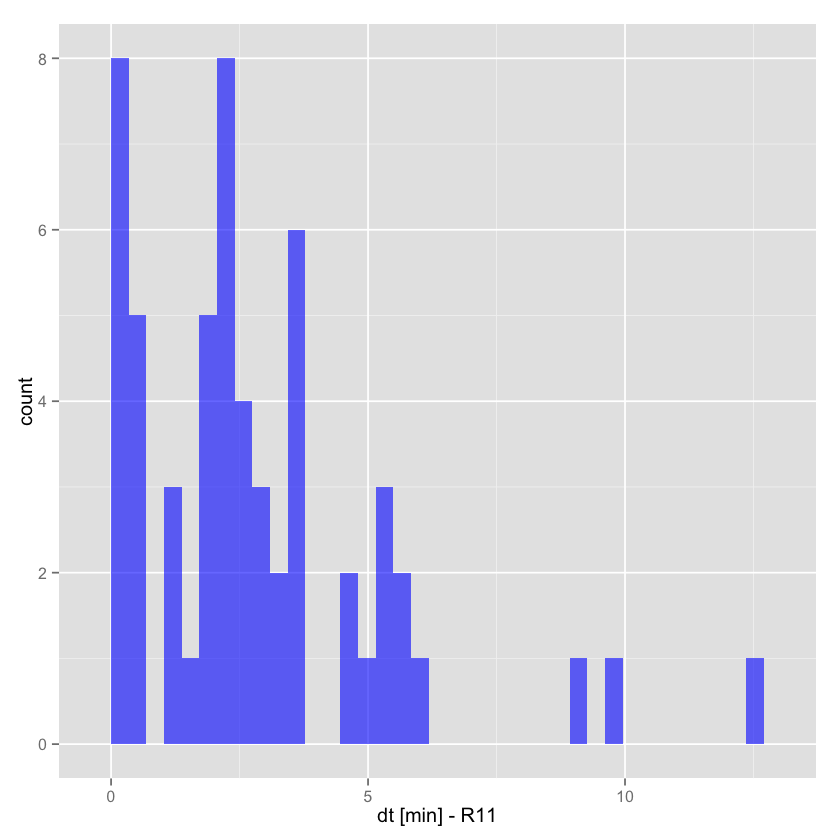

In [160]:
for(i in 1:length(dt_RList)){
    x_label <- paste0("dt [min] - R", i)
    plot <- ggplot(dt_RList[[i]],aes(x=dt_RList[[i]][,1])) + xlab(x_label) + geom_histogram(binwidth = 1/3+0.01, fill='blue', alpha=.6) # 1/3 because acquisitions happened every 20 seconds (=1/3 minute)
    print(plot)
}

# Analysis of the ensemble distribution

Is the ensemble distribution follow a poisson distribution?

In [248]:
# Combining all the dt (for each neuron)
dt_R <- cbind(t(dt_RList[[1]]), t(dt_RList[[2]]), t(dt_RList[[3]]), t(dt_RList[[4]]), t(dt_RList[[5]]), t(dt_RList[[6]]), t(dt_RList[[7]]), t(dt_RList[[8]]), t(dt_RList[[9]]), t(dt_RList[[10]]), t(dt_RList[[11]]))
length(dt_R)
mean(dt_R)
dt_R <- data.frame(t(dt_R))

[1] 668

[1] 2.776465

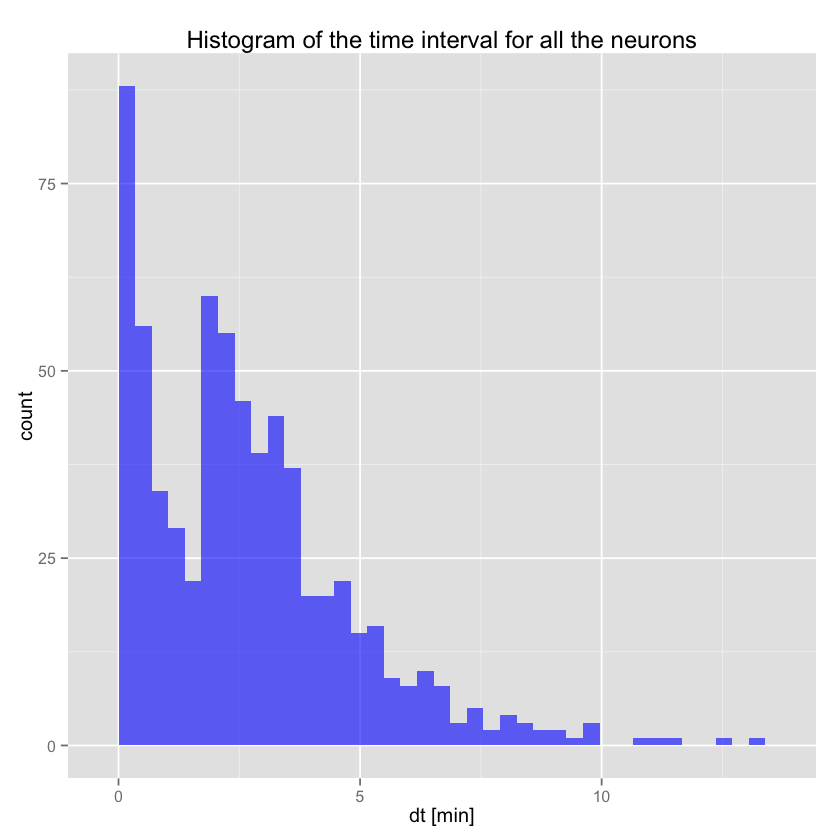

In [247]:
x_label="dt [min]"
plot <- ggplot(dt_R,aes(x=dt_R[,1])) + xlab(x_label) + geom_histogram(binwidth = 1/3+0.01, fill='blue', alpha=.6) # 1/3 because acquisitions happened every 20 seconds (=1/3 minute)
plot + ggtitle("Histogram of the time interval for all the neurons")
#print(plot)

What should be the Poisson distribution? 

In [257]:
# transform 0.333 in 1 to have only integer
temp <- dt_R*3
mean(temp[,1])
max(temp[,1])

[1] 8.329394

[1] 40.0025

In [258]:
lambda = mean(temp[,1])
x = seq(0, max(temp[,1]), 1)
y = (lambda**x * exp(-lambda)) / factorial(x)

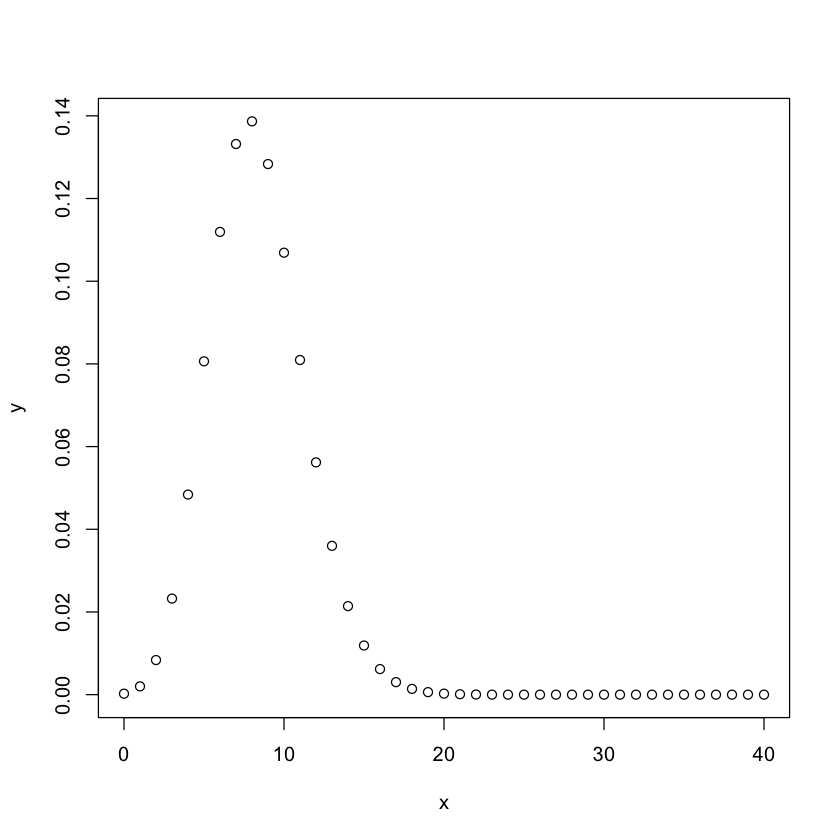

In [265]:
plot(x,y)

# Analysis of the synchronization

Activity rate of the neurons:

In [19]:
f_active <- function(d){
    sum(d[neuron.col], na.rm=T) / nb.neuron
}

In [20]:
data$active_neurons <- apply(data, 1, f_active)
head(data)

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,active_neurons
1,155.29,2.588167,0,0,0,0,0,0,0,1,0,0,0,0.09090909
2,175.29,2.9215,1,0,0,0,0,0,0,0,0,0,0,0.09090909
3,195.29,3.254833,0,0,0,0,0,0,1,0,0,0,0,0.09090909
4,215.29,3.588167,0,0,0,0,0,0,0,0,0,0,0,0
5,235.29,3.9215,0,0,0,0,0,1,0,0,0,0,0,0.09090909
6,255.29,4.254833,0,0,0,0,0,0,1,0,0,0,0,0.09090909


Select the rows when the activity is greater than 50%:

In [21]:
data.active <- data[data$active_neurons > 0.5,]
data.active
nrow(data.active)
data.active$min

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,active_neurons
144,3015.77,50.26283,0,1,1,0,1,1,0,0,0,1,1,0.5454545
255,5236.11,87.2685,0,1,0,1,0,0,1,1,1,1,1,0.6363636
386,7856.79,130.9465,1,0,0,1,0,1,1,0,0,1,1,0.5454545
411,8356.83,139.2805,0,0,1,1,0,1,0,1,1,1,0,0.5454545
517,10477.21,174.6202,1,0,0,1,0,0,1,1,1,1,0,0.5454545


[1] 5

[1]  50.26283  87.26850 130.94650 139.28050 174.62017

Plotting dt in function of time and try to look if the dt change after a activity greater than 50%

In [22]:
#length(TimeList[[1]][-length(TimeList[[1]])]) # time without the last value
#length(dt_RList[[1]][,1])

In [23]:
#plot(TimeList[[1]][-length(TimeList[[1]])], dt_RList[[1]][,1],main="R1")
#abline(v=data.active$min,col=c("red"))

In [24]:
temp <- data.frame(TimeList[[1]][-length(TimeList[[1]])], dt_RList[[1]][,1])
names(temp)[1] <- "time [min]"
names(temp)[2] <- "dt [min]"
head(temp)

,time [min],dt [min]
1,2.9215,2.000167
2,4.921667,2.333833
3,7.2555,1.666667
4,8.922167,6.668
5,15.59017,0.6666667
6,16.25683,3.333333


In [27]:
#plot <- ggplot(data=temp, aes(x=temp[[1]], temp[[2]])) + xlab("time [min]") + ylab("dt [min]") + geom_point(stat = "identity")
#plot <- plot + geom_vline(xintercept = data.active$min, colour="red")
#plot

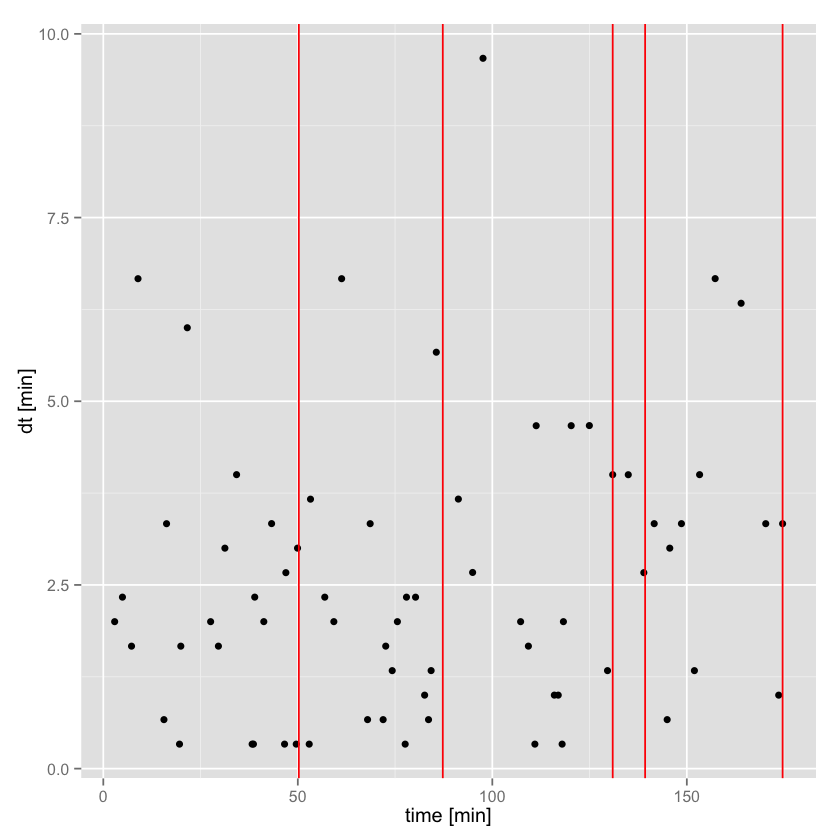

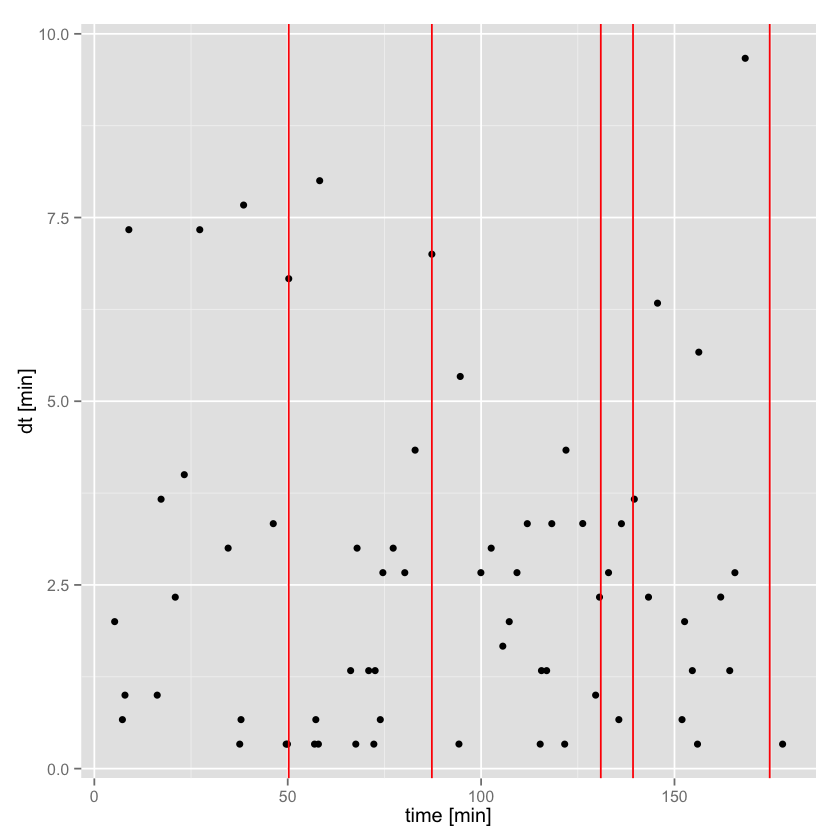

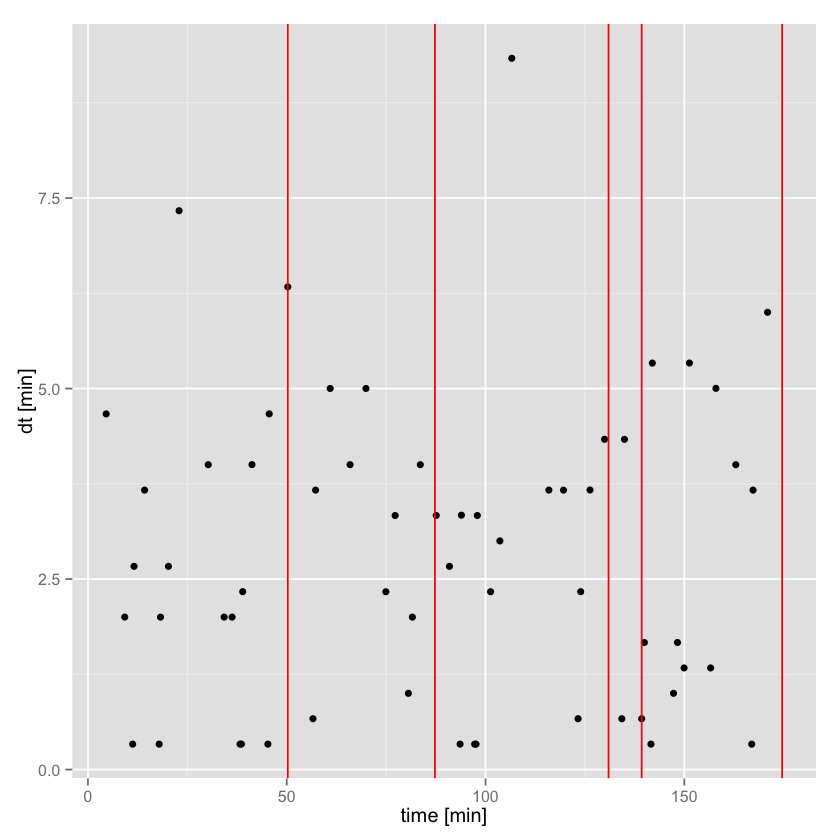

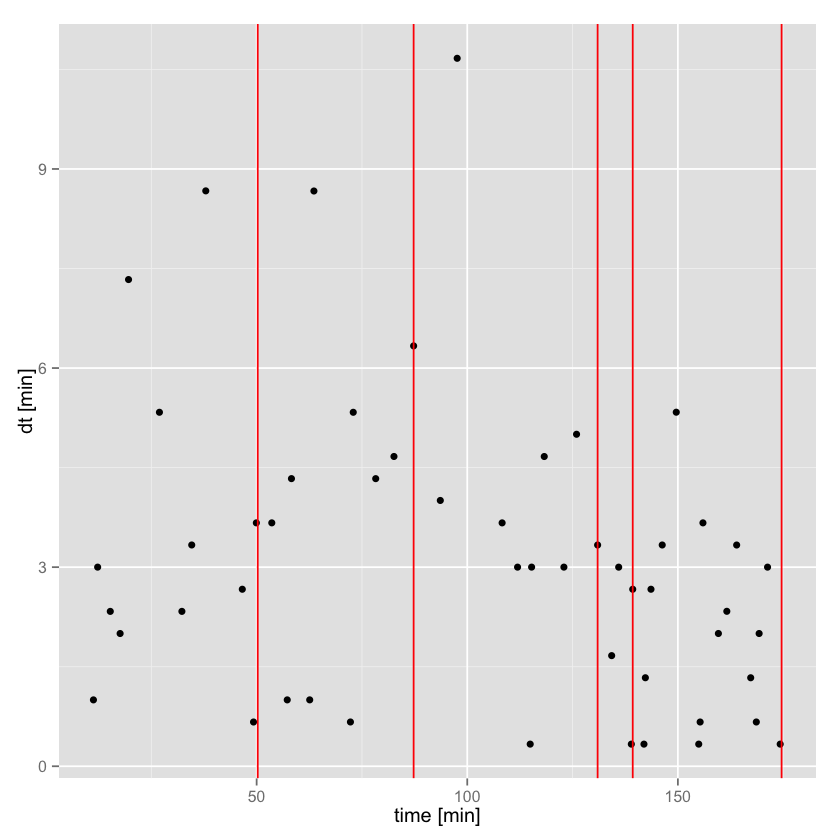

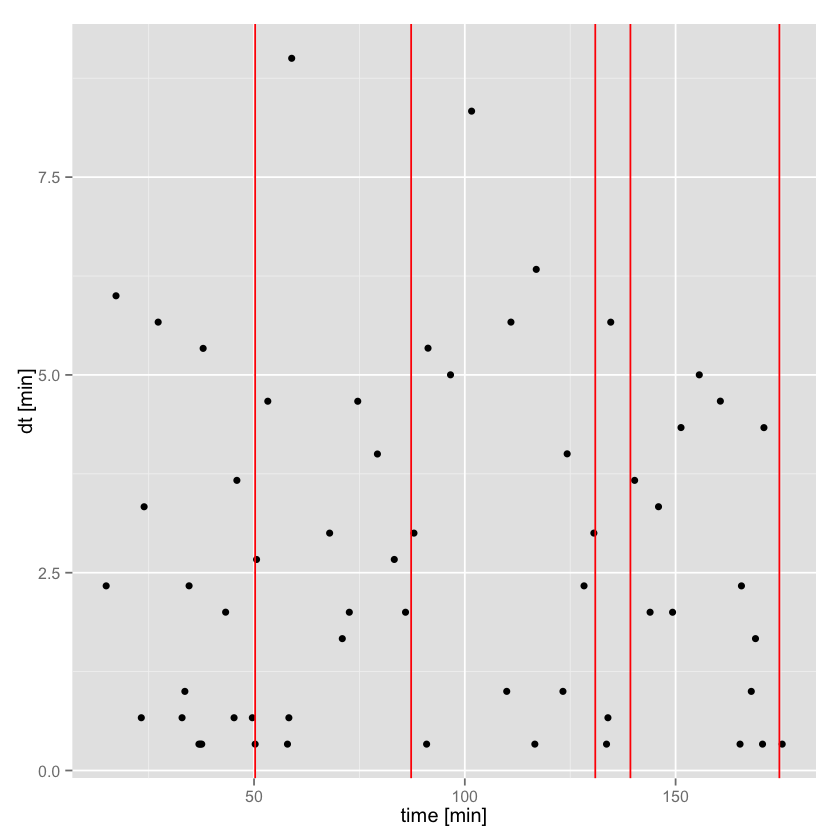

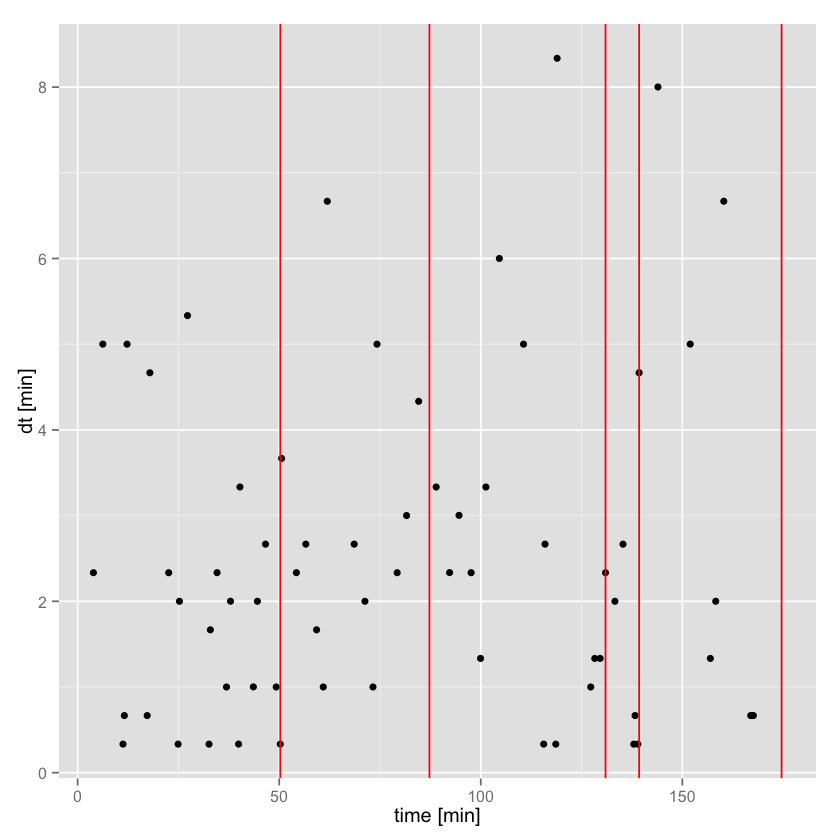

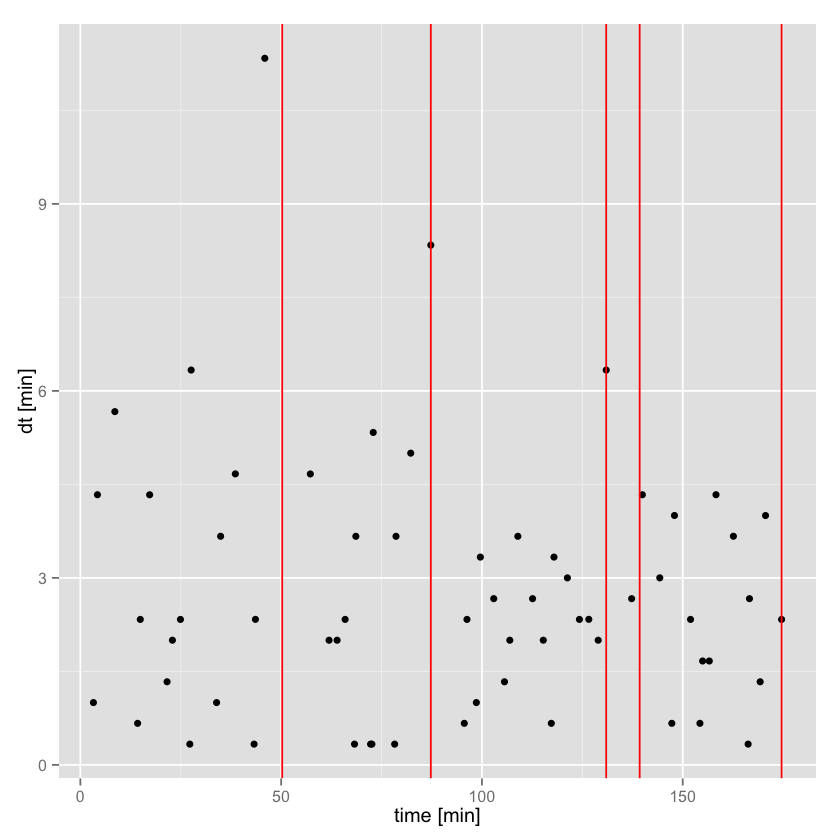

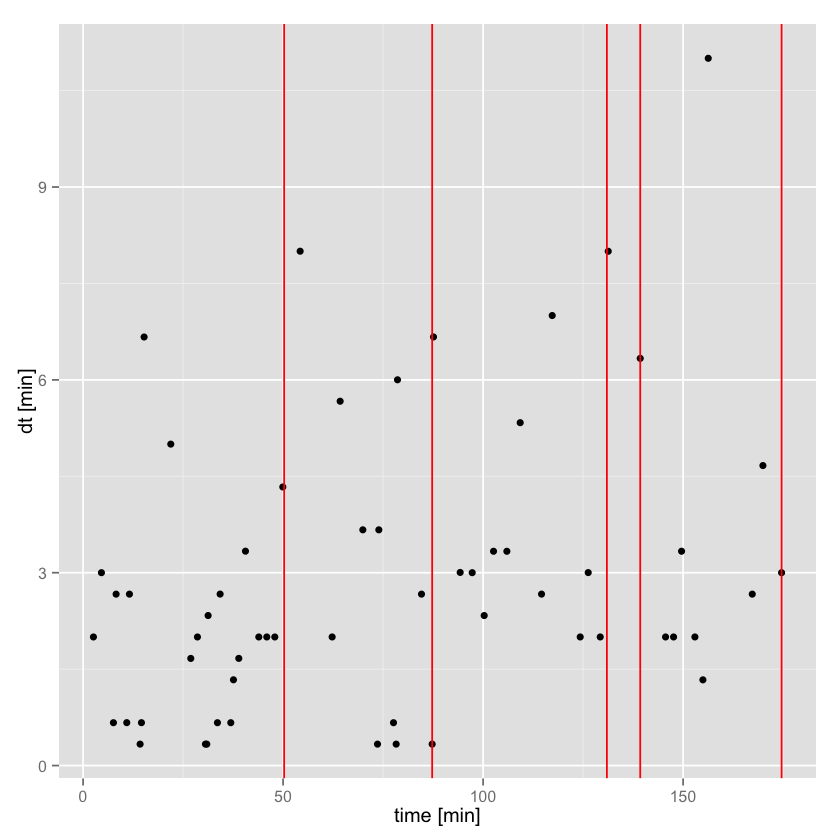

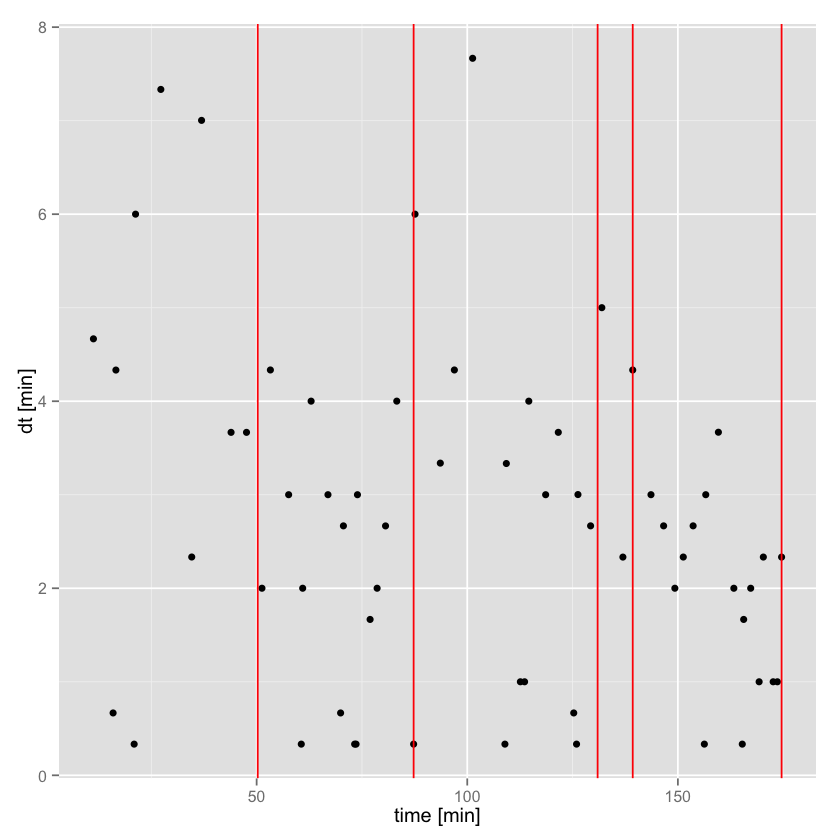

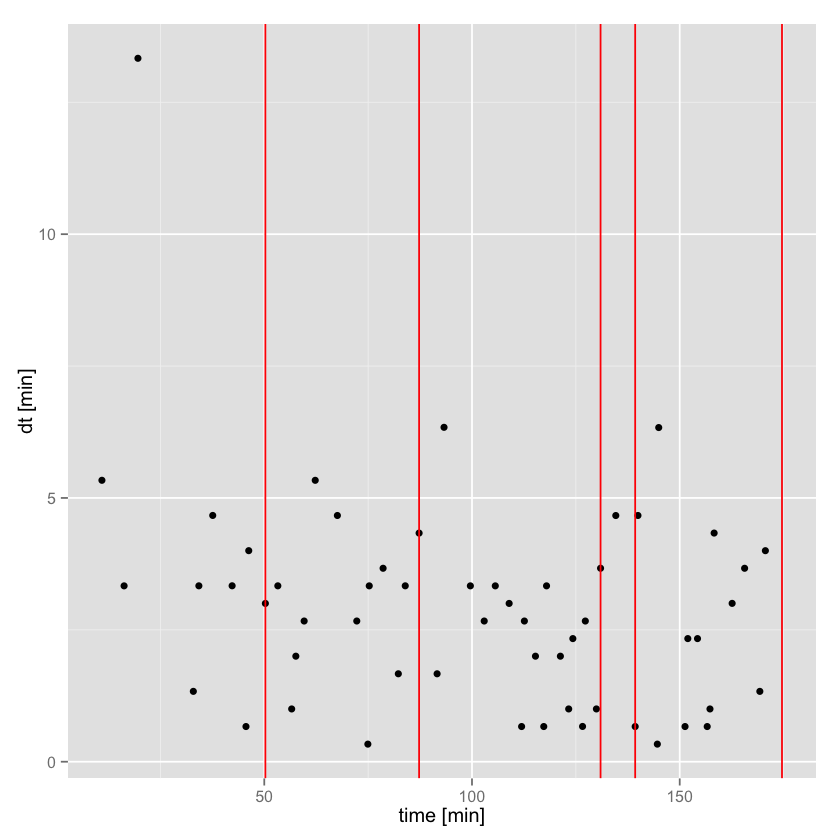

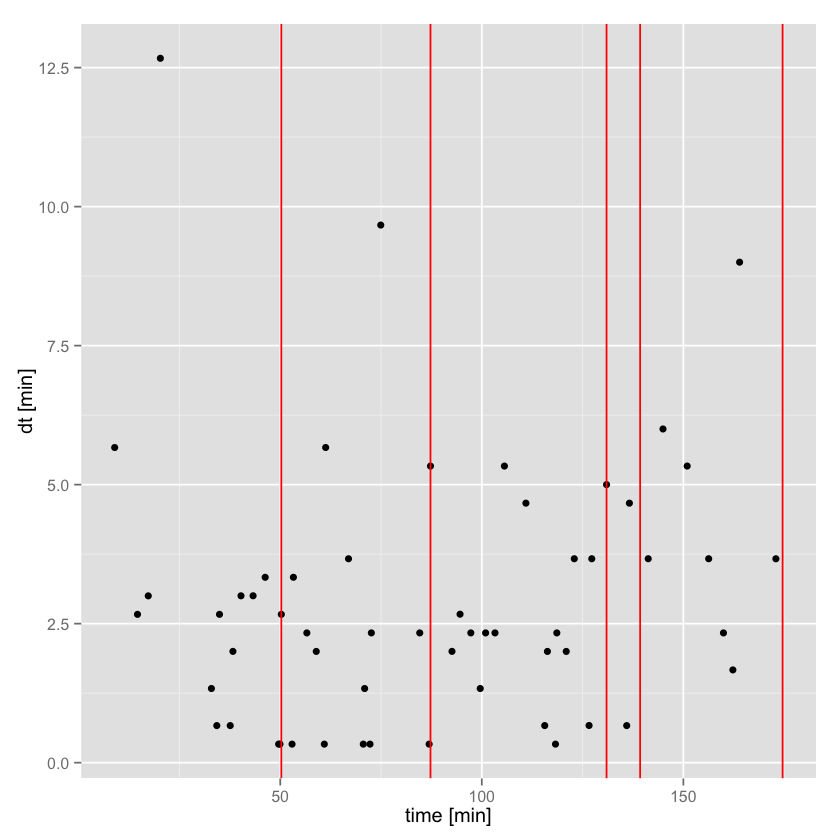

In [26]:
for(i in 1:length(dt_RList)){
    temp <- data.frame(TimeList[[i]][-length(TimeList[[i]])], dt_RList[[i]][,1])
    plot <- ggplot(data=temp, aes(x=temp[[1]], temp[[2]])) + xlab("time [min]") + ylab("dt [min]") + geom_point(stat = "identity")
    plot <- plot + geom_vline(xintercept = data.active$min, colour="red")
    print(plot)
}

In [28]:
head(data)

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,active_neurons
1,155.29,2.588167,0,0,0,0,0,0,0,1,0,0,0,0.09090909
2,175.29,2.9215,1,0,0,0,0,0,0,0,0,0,0,0.09090909
3,195.29,3.254833,0,0,0,0,0,0,1,0,0,0,0,0.09090909
4,215.29,3.588167,0,0,0,0,0,0,0,0,0,0,0,0
5,235.29,3.9215,0,0,0,0,0,1,0,0,0,0,0,0.09090909
6,255.29,4.254833,0,0,0,0,0,0,1,0,0,0,0,0.09090909


In [29]:
#par(mfrow=c(1,2))
#plot(data$min, data$active_neurons, xlab="t (min)", ylab="fraction neurone actif", main="données totales")
#plot(1:nrow(data.active), data.active$min, xlab="rang", ylab="t (min)", main="fraction active")

Representing the active neurons with a matrix

In [30]:
data.active[,neuron.col]/data.active$active_neurons

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11
144,0,1.833333,1.833333,0,1.833333,1.833333,0,0,0,1.833333,1.833333
255,0,1.571429,0,1.571429,0,0,1.571429,1.571429,1.571429,1.571429,1.571429
386,1.833333,0,0,1.833333,0,1.833333,1.833333,0,0,1.833333,1.833333
411,0,0,1.833333,1.833333,0,1.833333,0,1.833333,1.833333,1.833333,0
517,1.833333,0,0,1.833333,0,0,1.833333,1.833333,1.833333,1.833333,0


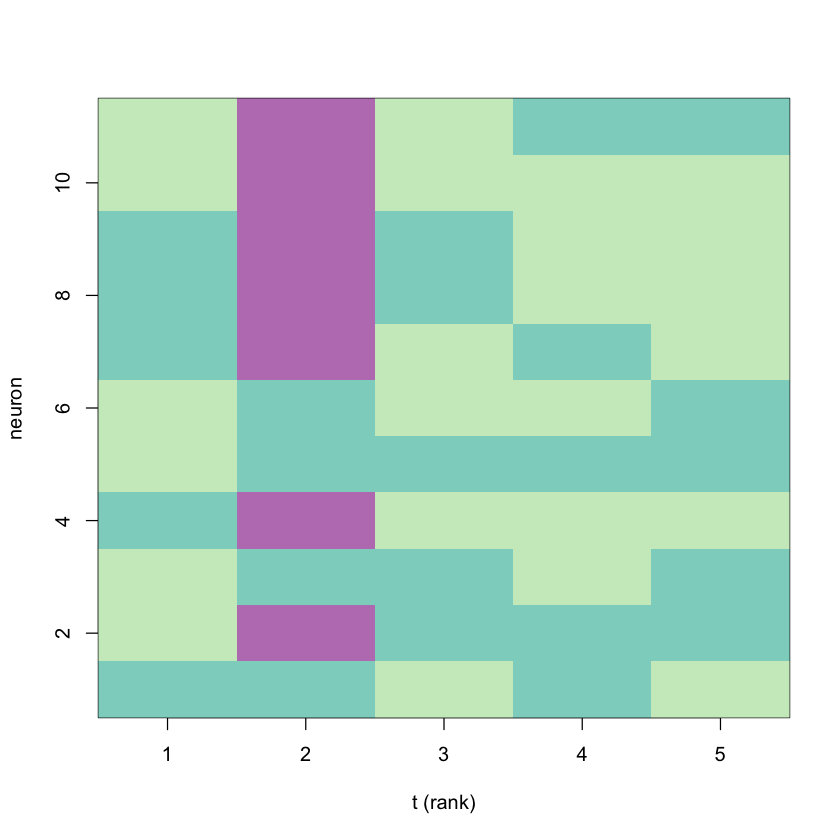

In [31]:
xlab <- "t (rank)"
ylab <- "neuron"
pal <- brewer.pal(nb.neuron, "Set3")
image(1:nrow(data.active), 1:nb.neuron, as.matrix(data.active[,neuron.col]/data.active$active_neurons), xlab=xlab, ylab=ylab, col=pal)

In [32]:
data.active[,neuron.col]
data.active[2,neuron.col]

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11
144,0,1,1,0,1,1,0,0,0,1,1
255,0,1,0,1,0,0,1,1,1,1,1
386,1,0,0,1,0,1,1,0,0,1,1
411,0,0,1,1,0,1,0,1,1,1,0
517,1,0,0,1,0,0,1,1,1,1,0


,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11
255,0,1,0,1,0,0,1,1,1,1,1


In [33]:
which(data.active[2,neuron.col]==1) # result is a vector containing the columns of the active neurons (row 2)

[1]  2  4  7  8  9 10 11

In [34]:
neuron.names[which(data.active[2,neuron.col]==1)] # result is a vector with the name of the active neurons (row 2)

[1] "R2"  "R4"  "R7"  "R8"  "R9"  "R10" "R11"

In [35]:
#length(data.active[,1])
for(i in 1:length(data.active[,1])){
    assign(paste0("activeNeurons_", i), neuron.names[which(data.active[i,neuron.col]==1)])
}

In [36]:
activeNeurons_List = list(activeNeurons_1, activeNeurons_2, activeNeurons_3, activeNeurons_4, activeNeurons_5)

All possible combinations of the active neurons

In [89]:
#mat <- combn(neuron.names[which(data.active[2,neuron.col]==1)],2)
#mat <- t(mat) # transpose
#mat

In [38]:
for(i in 1:length(activeNeurons_List)){
    assign(paste0("mat_", i), t(combn(neuron.names[which(data.active[i,neuron.col]==1)],2)))
}

In [39]:
mat_List = list(mat_1, mat_2, mat_3, mat_4, mat_5)

In [40]:
sum(data.active[2,neuron.col]) # number of active neurons (row 2)

[1] 7

In [41]:
data.active$min[2] # time [min] (row 2)

[1] 87.2685

In [88]:
mat_2[,1]

[1] "R2"  "R2"  "R2"  "R2"  "R2"  "R2"  "R4"  "R4"  "R4"  "R4"  "R4"  "R7" 
[13] "R7"  "R7"  "R7"  "R8"  "R8"  "R8"  "R9"  "R9"  "R10"

In [43]:
factor(mat_List[[2]][,1], neuron.names)

[1] R2  R2  R2  R2  R2  R2  R4  R4  R4  R4  R4  R7  R7  R7  R7  R8  R8  R8  R9 
[20] R9  R10
Levels: R1 R2 R3 R4 R5 R6 R7 R8 R9 R10 R11

In [44]:
factor(mat_List[[2]][,2], neuron.names)

[1] R4  R7  R8  R9  R10 R11 R7  R8  R9  R10 R11 R8  R9  R10 R11 R9  R10 R11 R10
[20] R11 R11
Levels: R1 R2 R3 R4 R5 R6 R7 R8 R9 R10 R11

# Graph analysis

Creation of the adjacency matrices

In [45]:
data.active

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,active_neurons
144,3015.77,50.26283,0,1,1,0,1,1,0,0,0,1,1,0.5454545
255,5236.11,87.2685,0,1,0,1,0,0,1,1,1,1,1,0.6363636
386,7856.79,130.9465,1,0,0,1,0,1,1,0,0,1,1,0.5454545
411,8356.83,139.2805,0,0,1,1,0,1,0,1,1,1,0,0.5454545
517,10477.21,174.6202,1,0,0,1,0,0,1,1,1,1,0,0.5454545


In [99]:
#mat_List[[1]] == t(combn(neuron.names[which(data.active[1,neuron.col]==1)],2))

In [100]:
#if (sum(data.active[1,neuron.col]) != 1){
#    mat <- mat_List[[1]]
#    data.frame(from=factor(mat[,1], neuron.names),#et je prend
#               to=factor(mat[,2], neuron.names),
#               min=data.active$min[i],
#               i=i)
#}

In [104]:
g.df <- ldply(1:nrow(data.active), function (i) {#ldply pour chaque element d'une liste (1:nrow(data.active)) applique une fonction et renvoie un dataframe
    if (sum(data.active[i,neuron.col]) == 1){#cas particulier: si la somme des colonnes de neurones pour la ligne i =1, ce qui ne se peut pas ici puisqu'on a un seuil de 50%
        data.frame(from=neuron.names[which(data.active[i,neuron.col]==1)],#cree une data.frame avec 3 vecteurs avec from et to qui sera le même neurone puisque il y en a un seul d'actif
                   to=neuron.names[which(data.active[i,neuron.col]==1)],
                   min=data.active$min[i],
                   i=i)
    } 
    else {#bon si la somme n'est pas égale à 1 ce qui est la règle avec le seuil de 50% 
    mat <- mat_List[[i]]#alors je cree une matrice de toutes les combinaisons des neurones et je la transpose <==> c'est les "mat" (==combinaisons) qu'on a créé plus haut
    data.frame(from=factor(mat[,1], neuron.names),#et je prend colonne 1
               to=factor(mat[,2], neuron.names), # puis colonne 2
               min=data.active$min[i],
               i=i)
    }
})
head(g.df)

,from,to,min,i
1,R2,R3,50.26283,1
2,R2,R5,50.26283,1
3,R2,R6,50.26283,1
4,R2,R10,50.26283,1
5,R2,R11,50.26283,1
6,R3,R5,50.26283,1


Creating a graph from the adjacency matrix

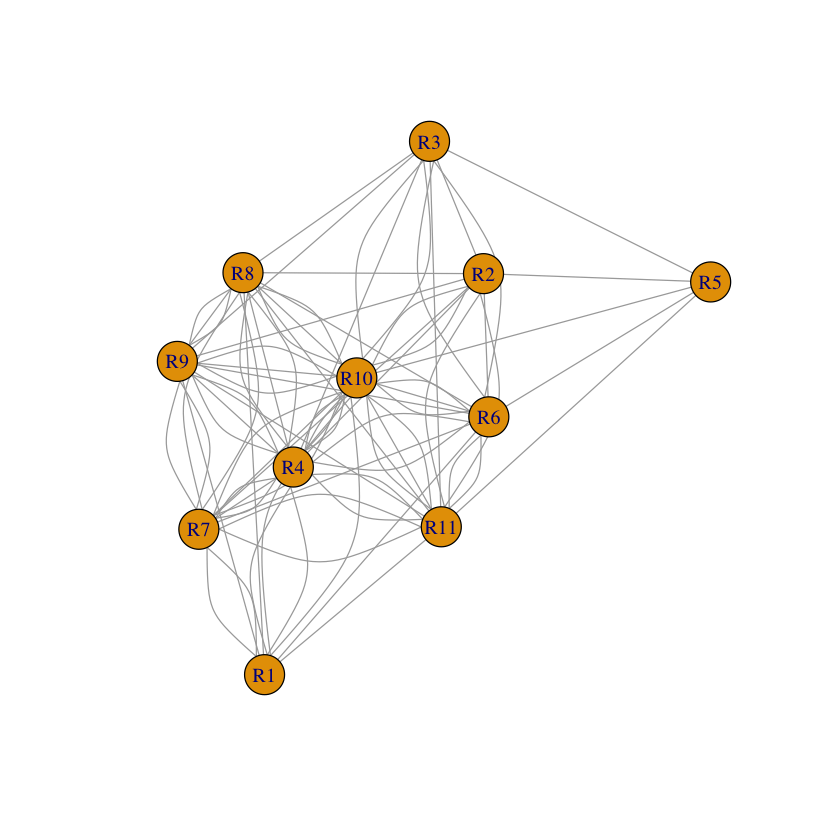

In [108]:
g<-graph.data.frame(g.df,directed=F)
plot(g)

In [109]:
# Vertex == neurons
V(g)

+ 11/11 vertices, named:
 [1] R2  R3  R5  R6  R10 R4  R7  R8  R9  R1  R11

In [110]:
# Edges == relations
E(g)

+ 81/81 edges (vertex names):
 [1] R2 --R3  R2 --R5  R2 --R6  R2 --R10 R2 --R11 R3 --R5  R3 --R6  R3 --R10
 [9] R3 --R11 R5 --R6  R5 --R10 R5 --R11 R6 --R10 R6 --R11 R10--R11 R2 --R4 
[17] R2 --R7  R2 --R8  R2 --R9  R2 --R10 R2 --R11 R4 --R7  R4 --R8  R4 --R9 
[25] R10--R4  R4 --R11 R7 --R8  R7 --R9  R10--R7  R7 --R11 R8 --R9  R10--R8 
[33] R8 --R11 R10--R9  R9 --R11 R10--R11 R4 --R1  R6 --R1  R7 --R1  R10--R1 
[41] R1 --R11 R6 --R4  R4 --R7  R10--R4  R4 --R11 R6 --R7  R6 --R10 R6 --R11
[49] R10--R7  R7 --R11 R10--R11 R3 --R4  R3 --R6  R3 --R8  R3 --R9  R3 --R10
[57] R6 --R4  R4 --R8  R4 --R9  R10--R4  R6 --R8  R6 --R9  R6 --R10 R8 --R9 
[65] R10--R8  R10--R9  R4 --R1  R7 --R1  R8 --R1  R9 --R1  R10--R1  R4 --R7 
[73] R4 --R8  R4 --R9  R10--R4  R7 --R8  R7 --R9  R10--R7  R8 --R9  R10--R8 
+ ... omitted several edges

Number of relations

In [140]:
degree(g)

R2  R3  R5  R6 R10  R4  R7  R8  R9  R1 R11 
 11  10   5  15  26  21  16  16  16  10  16

Another representation

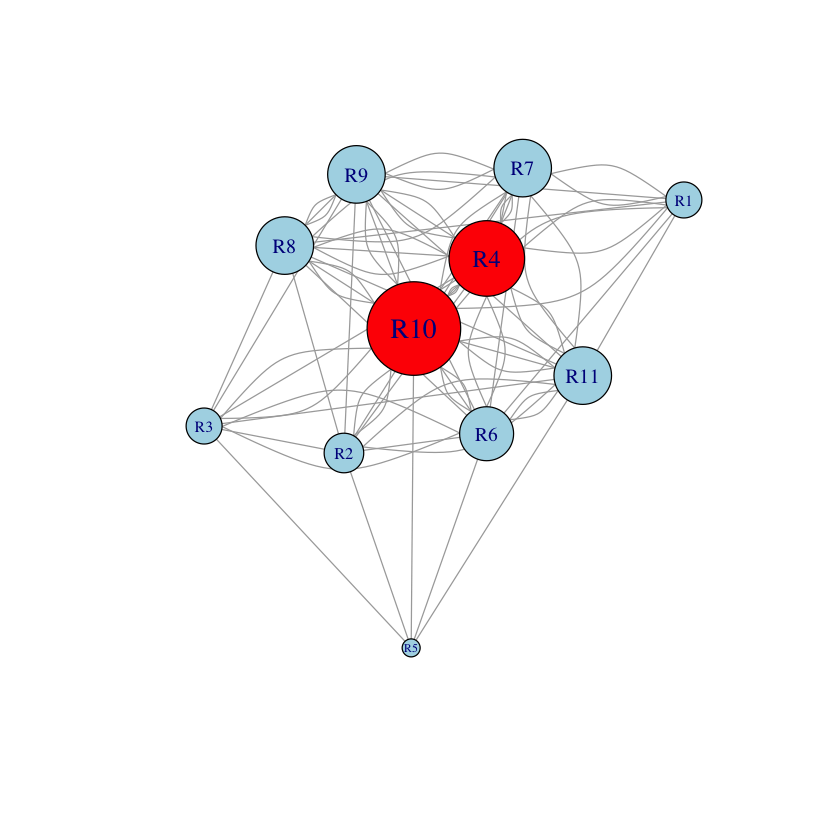

In [139]:
#paramètres
n_relations = 20
V(g)$label<-V(g)$name
V(g)$degree<-degree(g)
V(g)$color<-ifelse(V(g)$degree<n_relations,"lightblue","red") #donc si le nb de relations est <20 c'est en bleu sinon c'est en rouge
V(g)$label.cex<-V(g)$degree/max(V(g)$degree)+.4 # change la taille du label en fonction du degree
V(g)$size<-V(g)$degree*1.5 # change the size of the circles

#la représentation fruchterman reingold
set.seed(9)
layout1<-layout.fruchterman.reingold(g)#
plot(g,layout=layout1)

In [141]:
#plot(g, vertex.label=NA, vertex.size=3) # type watts-strogatz
#plot(g, layout=layout.circle,vertex.size=10)